In [1]:
import sys
sys.path.insert(1, '../')  # to load from any submodule in the repo

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from models import models

(1, 5000)

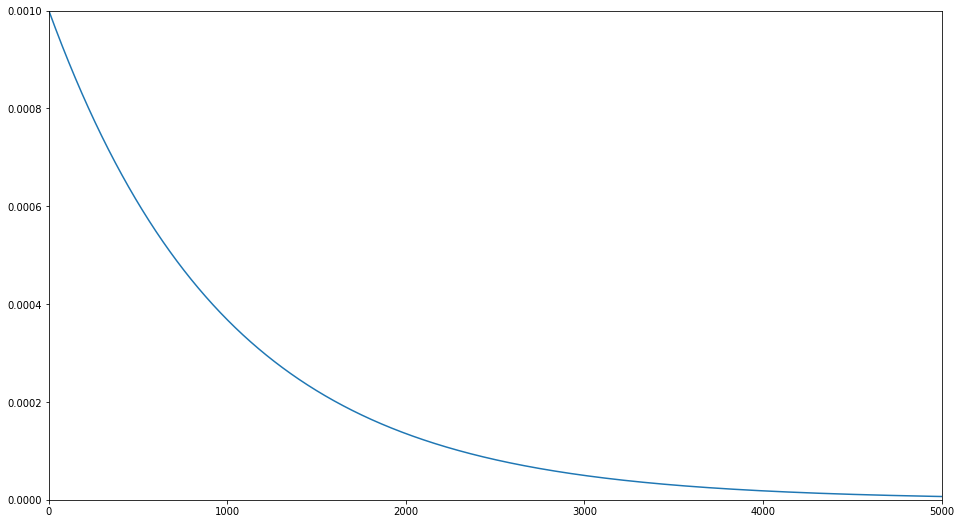

In [2]:
N = 5000
#momentum = 0.0005944125222904696
momentum = 5 / N

weights = np.zeros(N)
weights[0] = momentum

for i in range(1,N):
    weights[i] = (1.0 - momentum) ** i * momentum 
    

plt.figure(figsize=(16,9))
plt.plot(1+np.arange(N), weights)
plt.ylim(0, momentum)
plt.xlim(1, N)



In [3]:
class BN_base():
    
    def __init__(self, args):
        self.args = args
        
    def eval(self):
        print ("args = ", self.args)
        print ("base eval")
        
class BN_ext(BN_base):
    
    def __init__(self, args):
        super(BN_ext, self).__init__(args)
        
    def eval(self):
        super(BN_ext, self).eval()
        print ("args = ", self.args)
        print ("ext eval")       


In [4]:
bn = nn.BatchNorm1d(64)
lin = nn.Linear(64, 64)

In [5]:
if isinstance(bn, nn._NormBase):
    print(bn, "is of type nn.BatchNorm1d")
else:
    print(bn, "is NOT of type nn.BatchNorm1d")
    
if isinstance(lin, nn.BatchNorm1d):
    print(lin, "is of type nn.BatchNorm1d")
else:
    print(lin, "is NOT of type nn.BatchNorm1d")

AttributeError: module 'torch.nn' has no attribute '_NormBase'

In [6]:
model = models.getModel()

In [17]:
modules = [module for module in model.modules() if type(module) != nn.Sequential]

for idx, m in enumerate(model.modules()):
    if isinstance(m, nn.BatchNorm1d) or isinstance(m, nn.BatchNorm2d):
        print(idx, '->', m)

5 -> BatchNorm2d(64, eps=1e-05, momentum=None, affine=False, track_running_stats=True)
9 -> BatchNorm2d(64, eps=1e-05, momentum=None, affine=False, track_running_stats=True)
14 -> BatchNorm2d(64, eps=1e-05, momentum=None, affine=False, track_running_stats=True)
18 -> BatchNorm2d(64, eps=1e-05, momentum=None, affine=False, track_running_stats=True)
22 -> BatchNorm1d(256, eps=1e-05, momentum=None, affine=False, track_running_stats=True)
26 -> BatchNorm1d(96, eps=1e-05, momentum=None, affine=False, track_running_stats=True)
30 -> BatchNorm1d(64, eps=1e-05, momentum=None, affine=False, track_running_stats=True)
35 -> BatchNorm1d(32, eps=1e-05, momentum=None, affine=False, track_running_stats=True)
